# Dataset



In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# X = 4 * np.random.rand(100,1)
# Y = 4 + 7* X +  + 6*X**2 + 7*np.random.randn(100,1)

# X = 4 * np.random.rand(100,1)  # X sampled in [0,4]
# Y = 4 + 7*X + 6*X**2 + 7*np.random.randn(100,1)

X = 10 * np.random.rand(100,1)
Y = 17 *np.sin(X) +  2*np.random.randn(100,1)

X = (X - X.min()) / (X.max() - X.min())

X = np.clip(X, 1e-6, None)



# Dynamic Regression Functions (from Array)

In [89]:
def CustomRegression(RegressionFunction: list[list[int]], Xparam) -> int:
  PredictedValueConstant = 0
  for Term in RegressionFunction:
    PredictedValueConstant = PredictedValueConstant + (Term[0] * Xparam ** Term[1])

  return PredictedValueConstant


In [90]:
def ToString(RegressionFunction: list[list[int]]) -> str:
  StringOutput = f''
  for Term in RegressionFunction:
    StringOutput = StringOutput + f'{Term[0]} X ^ {Term[1]} + '
  return StringOutput




# Visualise Data Plot func



In [91]:
def PlotGraph(RegressionFunction: list[list[int]]):

  X_line = np.linspace(X.min(), X.max(), 100) # Creates 100 evenly spaced points

  # 4. Calculate the predicted Y-values (the regression line)

  Y_pred = 0

  for Term in RegressionFunction:
    Y_pred = Y_pred + (Term[0] *X_line**Term[1])


  # Y_pred = (C1 *X_line**E1) + (C2 *X_line**E2) + (C3 * X_line ** E3)


  # Add titles and labels

  plt.figure(figsize=(10, 6))
  plt.scatter(X, Y)
  plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: {ToString(RegressionFunction)}')

  plt.title('Years of Experience vs. Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()

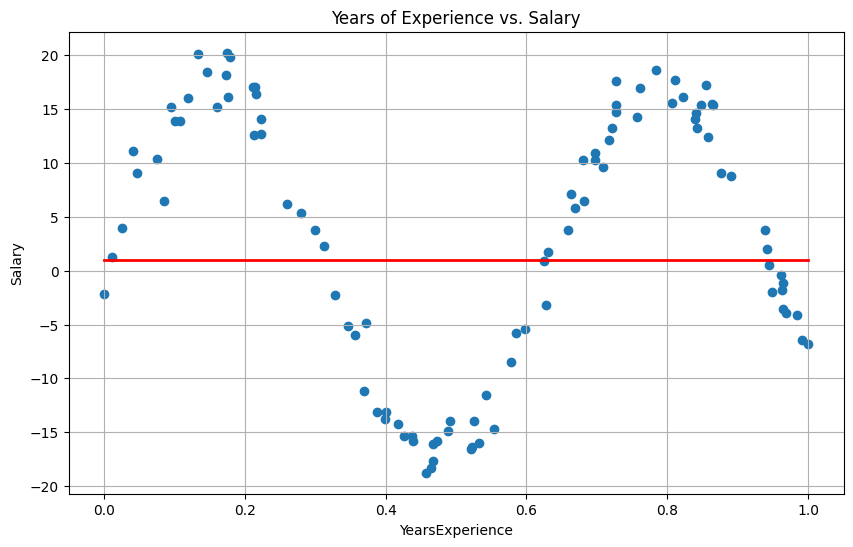

In [92]:
PlotGraph([[1,0],[0,1],[0,1]])

# Mean Squared Error Calculator

we're using the same data throughout, hence no need of DYNAMIC dynamic functions

In [93]:
# InputType: list[list[int]] = [[C1,E1],[C2,E2],[C3,E3]....]

def MSE(RegressionFunction: list[list[int]]):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = CustomRegression(RegressionFunction, XStream[N].item())

    Error = ObservedValue - PredictedValue
    ErrorSquared = Error ** 2

    Summation += ErrorSquared
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (Summation / len(YStream)).item()


In [94]:
MSE([[1,2],[5,6],[2,3]])

149.1764059548965

# Partial Derivatives
This is to look at the rate of change of the BiVariate MSE with respects to only 1 Parameter

In [95]:
def PartialDerivativeCN(CD, ED, RegressionFunction: list[list[int]]): # Its okay to pass in CD & ED Twice, it'll be easier later
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = CustomRegression(RegressionFunction,XStream[N].item())

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N].item() ** ED

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (2 * Summation / len(YStream)).item()

In [96]:
import math
def PartialDerivativeEN(CD,ED, RegressionFunction: list[list[int]]):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = CustomRegression(RegressionFunction,XStream[N].item())

    Error = PredictedValue - ObservedValue
    if not XStream[N].item() <= 0:

      ErrorXPartialDer = Error * (CD * (XStream[N].item()**ED) * (math.log(XStream[N].item())))
    else:
      continue


    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (2 * Summation / len(YStream)).item()

# Gradient Descent Iteration Steps

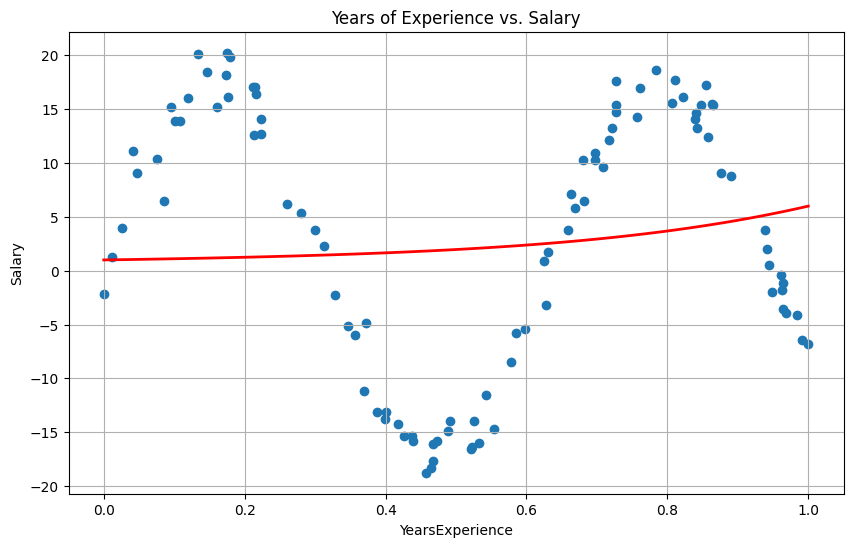

Final Parameters give an MSE Of 42.202304640574084, Parameters are 55.858589934616944 X ^ 0.26947253080882644 + -184.69060399926323 X ^ 1.0782546591067623 + 95.83856797116071 X ^ 2.6811883138556483 + 137.97646163887725 X ^ 3.0571570728790842 + 60.468381458408125 X ^ 3.7572290792317626 + -176.77153470519565 X ^ 6.307101920461106 + 


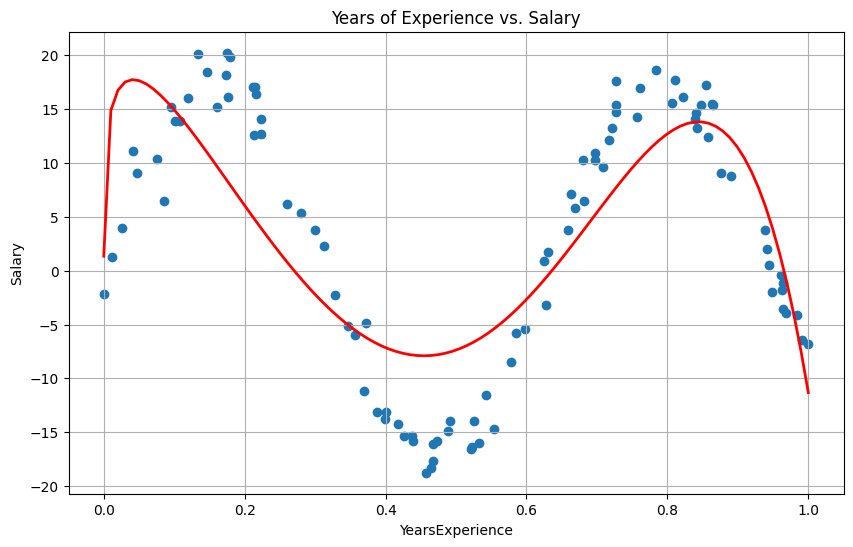

In [97]:
AlphaC = 0.01
AlphaE = 1e-6 # Make steps of Exponent, almost nano

Ca = 1
Ea = 1
Cb = 1
Eb = 1
Cc = 1
Ec = 1


MaxIterations = 150000
MaxDegree = 6

RegressionTerms = []

# RegressionTerms = [[0,0],[0,1],[0,2],[0,3],[0,4]] # randomly initialised

# RegressionTerms = [
#     [1.0, 0.0],   # constant
#     [0.1, 1.0],   # x
#     [0.01, 2.0],  # x^2
#     [0.001, 3.0], # x^3
#     [0.0001, 4.0] # x^4
# ]

# import random
# RegressionTerms = [
#     [random.uniform(0.1, 3.0),   # coefficient
#      random.uniform(-3.0, 3.0)]  # exponent
#     for _ in range(4)
# ]


# InitialTerm =

for D in range(MaxDegree):
  RegressionTerms.append([1,D])

# RandomInitial


PlotGraph(RegressionTerms)

MSE_History = [MSE(RegressionTerms)]



for I in range(MaxIterations):

  # PRE COMPUTED PARTIAL DERIVATIVES - avoid mid iteration changes
  # dCa = PartialDerivativeCN(Ca,Ea, Cb,Eb,Cc,Ec)
  # dEa = PartialDerivativeEN(Ca,Ea, Cb,Eb,Cc,Ec)
  # dCb = PartialDerivativeCN(Cb,Eb, Ca,Ea,Cc,Ec)
  # dEb = PartialDerivativeEN(Cb,Eb, Ca,Ea,Cc,Ec)
  # dCc = PartialDerivativeCN(Cc,Ec, Ca,Ea,Cb,Eb)
  # dEc = PartialDerivativeEN(Cc,Ec, Ca,Ea,Cb,Eb)

  # Ca = Ca - (Alpha * dCa)
  # Ea = Ea - (Alpha * dEa)

  # Cb = Cb - (Alpha * dCb)
  # Eb = Eb - (Alpha * dEb)

  # Cc = Cc - (Alpha * dCc)
  # Ec = Ec - (Alpha * dEc)
  # ----
  # Ca = Ca - (AlphaC * PartialDerivativeCN(Ca,Ea, Cb,Eb,Cc,Ec))
  # Ea = Ea - (AlphaE * PartialDerivativeEN(Ca,Ea, Cb,Eb,Cc,Ec))

  # Cb = Cb - (AlphaC * PartialDerivativeCN(Cb,Eb, Ca,Ea,Cc,Ec))
  # Eb = Eb - (AlphaE * PartialDerivativeEN(Cb,Eb, Ca,Ea,Cc,Ec))

  # Cc = Cc - (AlphaC * PartialDerivativeCN(Cc,Ec, Ca,Ea,Cb,Eb))
  # Ec = Ec - (AlphaE * PartialDerivativeEN(Cc,Ec, Ca,Ea,Cb,Eb))


  # for TermIndex in range(len(RegressionTerms)):
  #     RegressionTerms[TermIndex][0] = RegressionTerms[TermIndex][0] - (AlphaC * PartialDerivativeCN(RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1], RegressionTerms))
  #     RegressionTerms[TermIndex][1] = RegressionTerms[TermIndex][1] - (AlphaE * PartialDerivativeEN(RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1], RegressionTerms))



  min_exp = -5 # PREVENT EXPONENT EXPLOSION
  max_exp = 8 # PREVENT EXPONENT EXPLOSION

  # PRE COMPUTING PARTIAL DERIVATIVES (Stability and avoding miditeration changes)

  PartialDerivatives = []

  for TermIndex in range(len(RegressionTerms)):
      tempParDerArr = []
      tempParDerArr.append(PartialDerivativeCN(RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1], RegressionTerms))
      tempParDerArr.append(PartialDerivativeEN(RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1], RegressionTerms))

      PartialDerivatives.append(tempParDerArr)


  for TermIndex in range(len(RegressionTerms)):
        RegressionTerms[TermIndex][0] = RegressionTerms[TermIndex][0] - (AlphaC * PartialDerivatives[TermIndex][0])
        RegressionTerms[TermIndex][1] = RegressionTerms[TermIndex][1] - (AlphaE * PartialDerivatives[TermIndex][1])


        RegressionTerms[TermIndex][1] = np.clip(RegressionTerms[TermIndex][1], min_exp, max_exp) # PREVENT EXPONENT EXPLOSION, USE CLIP, BASICALLY IF BIGGER THAN 8, IT BECOMES 8, IF ITS SMALLER THAN -5, IT BECOMES -5






  MSE_History.append(MSE(RegressionTerms))



print(f'Final Parameters give an MSE Of {MSE(RegressionTerms)}, Parameters are {ToString(RegressionTerms)}')

PlotGraph(RegressionTerms)

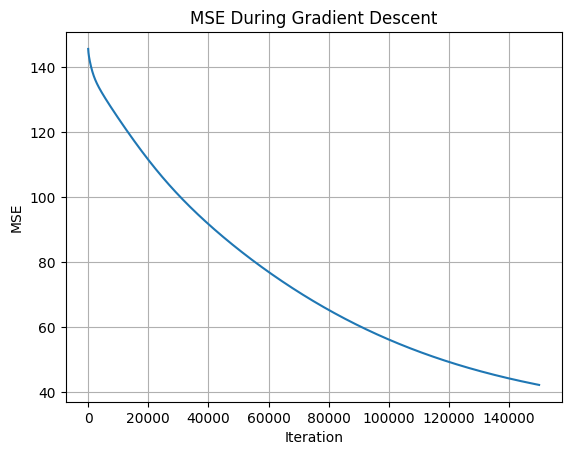

In [98]:

plt.plot(MSE_History)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE During Gradient Descent")
plt.grid(True)
plt.show()